# **COMPUTATIONAL GEOMETRY**
ΥΠΟΛΟΓΙΣΤΙΚΗ ΓΕΩΜΕΤΡΙΑ

---

ΠΡΙΜΕΝΤΑ ΑΙΚΑΤΕΡΙΝΗ-ΜΑΡΙΑ\
sdi1900160

#**Υλοποίηση 1: Κυρτό περίβλημα.**


1) Αυξητικός αλγόριθμος.

In [1]:
import numpy as np

def orientation(p1,p2,p3):
  if((p2[0]*p3[1])-(p2[1]*p3[0])-(p1[0]*p3[1])+(p1[1]*p3[0])+(p1[0]*p2[1])-(p1[1]*p2[0])) < 0:    #right orientation
    return True
  return False

def incremental(P):
  P.sort()                                                                                  #sort set by x
  Lup = [P[0],P[1]]                                                                         #initialize L upper
  for i in range(2,len(P)):
    Lup.append(P[i])
    while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   #lup has more than 2 elements and the 3 last points are not clockwise oriented
      Lup.pop(len(Lup)-2)                                                                     #remove 2nd from end point
  Llow  = [P[len(P)-1],P[len(P)-2]]                                                             #initialize L lower
  for i in range(len(P)-3,-1,-1):
    Llow.append(P[i])
    while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   #llow has more than 2 elements and the 3 last points are not clockwise oriented
      Llow.pop(len(Llow)-2)                                                                   #remove 2nd from end point
  Llow.pop(0)                                                                                   #remove first and last point from llow
  Llow.pop(len(Llow)-1)
  L = Lup + Llow
  return np.array(L)

Αλγόριθμος Περιτυλίγματος.

In [2]:
def collinear(p1,p2,p3):
  if((p3[1] - p2[1])*(p2[0] - p1[0]) == (p2[1] - p1[1])*(p3[0] - p2[0])):
    return True
  return False


def giftwrapping(S):
  S = sorted(S, key=lambda k: [k[0],k[1]])        #sort S with the smallest x
  r0 = S[0]                                       #initialize r0
  r = r0                                          #initialize current r
  P = []                                          #chain of points
  while True:
    P.append(r)                                   #current point in chain
    u = S[0]                                      #begin with r0 point as u
    for j in range(1,len(S)):
      t = S[j]                                      #point t in S
      if(orientation(r,u,t) or collinear(r,u,t)):   #check cw orientation and collinearity
        u = t
    if(u == r0):                                    #end point is the starting point
      break
    r = u
    S.remove(r)                                    #remove visisted point r
  return np.array(P)

Αλγόριθμος Διαίρει και Βασίλευε.

In [4]:
import math

def divideConquer(P):
  P.sort()                            #sort by x
  if(len(P) <= 2):                    #very few points
    return P
  alen = math.ceil(len(P)/2)
  blen = math.floor(len(P)/2)
  a = P[0:alen]                       #divide into 2 subsets
  b = P[alen:len(P)]
  ahull = divideConquer(a)            #find convex hull of the 2 subsets recursively
  bhull = divideConquer(b)
  return merge(ahull,bhull)           #merge convex hulls

def merge(ahull, bhull):
  rightmosta = max(ahull)             #find rightmost point of a
  leftmostb = min(bhull)              #find leftmost point of b
  uppera, upperb, lowera, lowerb = intersection(ahull, bhull, rightmosta, leftmostb)
  mergedch = []                       #merged polygon
  ai = uppera
  mergedch.append(ahull[uppera])      #begin with upper point of hull A
  while ai!=lowera:                   #append all the points between upper and lower point of A - counterclockwise orientation
    ai = (ai + 1)%len(ahull)          #attention to limits
    mergedch.append(ahull[ai])

  bj = lowerb
  mergedch.append(bhull[lowerb])      #connect the half of convex hull A with the lowest point of B
  while bj!=upperb:                   #append all the points between lower and upper point of B - counterclockwise orientation
    bj = (bj + 1)%len(bhull)          #attention to limits
    mergedch.append(bhull[bj])

  return mergedch

def intersection(ahull, bhull, rightmosta, leftmostb):
  ai = ahull.index(rightmosta)        #find Ai
  bj = bhull.index(leftmostb)         #find Bj

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    ai2 = (ai1 + 1) % len(ahull)                    #Ai+1 - attention not getting out of limits
    while(orientation(ahull[ai1],ahull[ai2],bhull[bj1]) and not collinear(ahull[ai1],ahull[ai2],bhull[bj1])):     #clockwise Ai Ai+1 Bj - case for collinearity
      ai1 = (ai1 + 1) % len(ahull)              #increase i
      ai2 = (ai1 + 1) % len(ahull)
      flag = 1                                    #i changed

    bj2 = (bj1 - 1 + len(bhull))%len(bhull)        #Bj-1
    while(orientation(bhull[bj2],bhull[bj1],ahull[ai1]) and not collinear(bhull[bj2],bhull[bj1],ahull[ai1])):     #clockwise Bj-1 Bj Ai case for collinearity
      bj1 = (bj1 - 1 + len(bhull))%len(bhull)
      bj2 = (bj1 - 1 + len(bhull))%len(bhull)
      flag = 1                                    #j changed

  uppera = ai1                          #upper bridge AiBj
  upperb = bj1

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    bj2 = (bj1 + 1) % len(bhull)                    #Bi+1 - attention not getting out of limits
    while(orientation(bhull[bj1],bhull[bj2],ahull[ai1]) and not collinear(bhull[bj1],bhull[bj2],ahull[ai1])):     #clockwise Bj Bj+1 Ai
      bj1 = (bj1 + 1) % len(bhull)              #increase j
      bj2 = (bj1 + 1) % len(bhull)
      flag = 1                                    #j changed

    ai2 = (ai1 - 1 + len(ahull))%len(ahull)        #Aj-1
    while(orientation(ahull[ai2],ahull[ai1],bhull[bj1]) and not collinear(ahull[ai2],ahull[ai1],bhull[bj1])):     #clockwise Ai-1 Ai Bj
      ai1 = (ai1 - 1 + len(ahull))%len(ahull)
      ai2 = (ai1 - 1 + len(ahull))%len(ahull)
      flag = 1                                    #i changed

  lowera = ai1                          #lower bridge AiBj
  lowerb = bj1

  return uppera, upperb, lowera, lowerb

Αλγόριθμος QuickHull.

In [5]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def quickhull(P):
  return ConvexHull(P)

2) *Αυξητικός αλγόριθμος:* Πολυπλοκότητα Ο(nlogn) στη μέση και στη χειρότερη περίπτωση, όπου τα σημεία είναι ομοιόμορφα κατανεμημένα. Εκφυλισμένες περιπτώσεις όπου όλα τα σημεία αποτελούν κορυφές του κυρτού περιβλήματος (πχ. να βρίσκονται σε περιφέρεια κύκλου), δίνουν πολυπλοκότητα Ο(n^2). Άλλες τέτοιες περιπτώσεις είναι αυτές που τα n-1 σημεία βρίσκονται στην ακμή την οποία ορίζουν το αριστερότερο και το δεξιότερο σημείο, όπου η πολυπλοκότητα γίνεται γραμμιική O(n).\
*Αλγόριθμος περιτυλίγματος (Jarvis):* Πολυπλοκότητα Ο(nH), όπου H το πλήθος κορυφών στο κυρτό περίβλημα. Η συμπεριφορά του αλγορίθμου εξαρτάται από το πλήθος των κορυφών τους περιβλήματος. Ένα άνω φράγμα για την πολυπλοκότητα ως προς το μέγεθος της εισόδου είναι Ο(n^2), που αποτελεί και τη χειρότερη περίπτωση. Για μικρό πλήθος κορυφών γίνεται Ο(n).\
*Αλγόριθμος Διαίρει και Βασίλευε:* Πολυπλοκότητα Ο(nlogn).\
*Αλγόριθμος QuickHull:* Πολυπλοκότητα Ο(nlogn) εαν τα σημεία είναι κατανεμημένα τυχαία, αλλιώς Ο(n^2).






3) QuickHull σε 3 διαστάσεις.

In [6]:
def quickhull3d(P):
  return ConvexHull(P)

#**Εφαρμογή 1:**

1) Ορίζουμε 80 τυχαία σημεία στο επίπεδο και θεωρούμε ότι παίρνουν πραγματικές τιμές από 0 μέχρι 200:

In [7]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(80)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 81.07944273 166.06822509]
 [108.1642838   48.78307668]
 [ 96.98892894  82.07382353]
 [196.21041374   7.8556431 ]
 [158.30906784  57.50075331]
 [151.29901072  90.32792777]
 [ 75.71768074 144.30814637]
 [189.44574589  14.46178836]
 [120.70302267 143.61336398]
 [141.14969141 149.95424692]
 [174.88080234 140.29422763]
 [  3.85913431 138.44999829]
 [ 83.28572629  92.47874699]
 [ 20.58664539  84.2900534 ]
 [123.89632717  49.09543081]
 [ 24.30120684 198.93916803]
 [137.50927101  64.3858906 ]
 [ 47.88097452 188.28575916]
 [100.80950848 156.98469283]
 [106.49911961 128.19763453]
 [ 57.39325188 152.47843428]
 [ 57.71413812  37.68288473]
 [146.31922733 146.5512348 ]
 [180.07789953 186.21153539]
 [ 91.68451873 153.30753767]
 [ 58.35434562  88.28823637]
 [ 85.06658444  41.68067173]
 [120.98946069 100.02095826]
 [ 20.98809387 150.86093387]
 [ 50.42024677  42.83545402]
 [ 10.02239077 142.03577644]
 [ 77.92419883  46.77148614]
 [ 42.67547953  49.12488769]
 [ 70.60037613  86.07137954

α) Αυξητικός αλγόριθμος.

Points of convex hull:
[[  0.75756828 159.7068195 ]
 [ 14.82669443 192.577962  ]
 [ 24.30120684 198.93916803]
 [ 94.39333278 199.00652756]
 [180.07789953 186.21153539]
 [197.0034013  111.66161781]
 [196.21041374   7.8556431 ]
 [ 72.44746738  15.6214235 ]
 [ 22.66678593  50.01093172]
 [  8.09657012  60.50586221]]


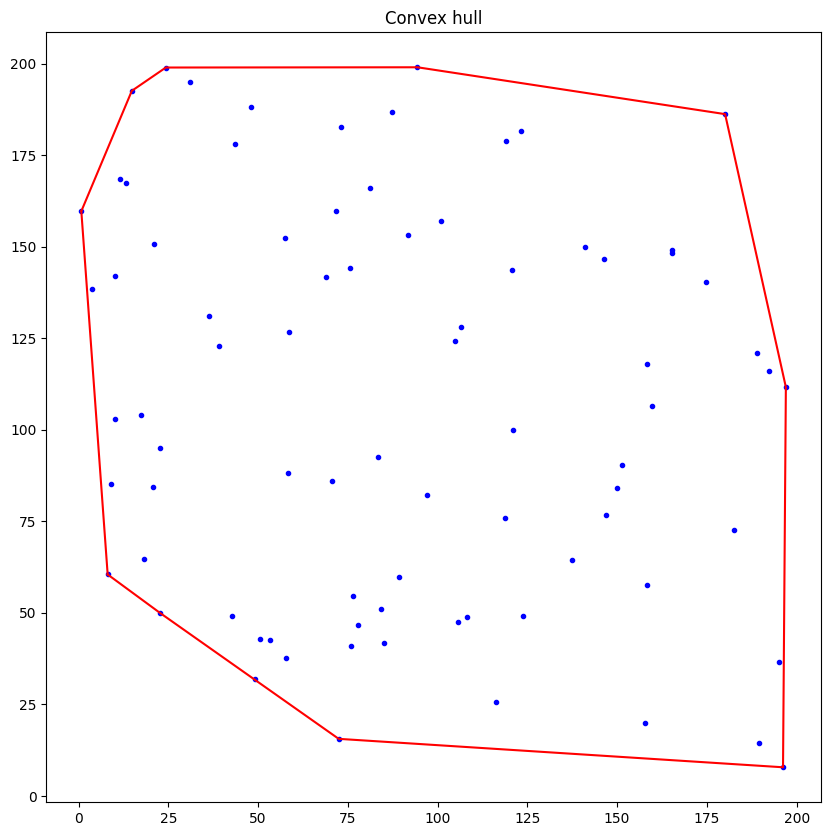

In [8]:
import matplotlib.pyplot as plt
import copy

def plot2D(Par,L):
  plt.figure(figsize=(10,10))
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  x = L[:,0]
  y = L[:,1]
  plt.plot(x,y,'r-')      #plot points of convex hull using coordinates x and y
  xlast = [L[len(x)-1,0],L[0,0]]
  ylast = [L[len(x)-1,1],L[0,1]]
  plt.plot(xlast, ylast, 'r-')    #plot last vertex
  plt.title("Convex hull")
  plt.show()


Pinc = copy.deepcopy(P)       #safe method to ensure that P will not change
Pincar = np.array(Pinc)
L = incremental(Pinc)
print("Points of convex hull:")
print(L)
plot2D(Pincar,L)

Αλγόριθμος περιτυλίγματος.

Points of convex hull:
[[  0.75756828 159.7068195 ]
 [  8.09657012  60.50586221]
 [ 22.66678593  50.01093172]
 [ 72.44746738  15.6214235 ]
 [196.21041374   7.8556431 ]
 [197.0034013  111.66161781]
 [180.07789953 186.21153539]
 [ 94.39333278 199.00652756]
 [ 24.30120684 198.93916803]
 [ 14.82669443 192.577962  ]]


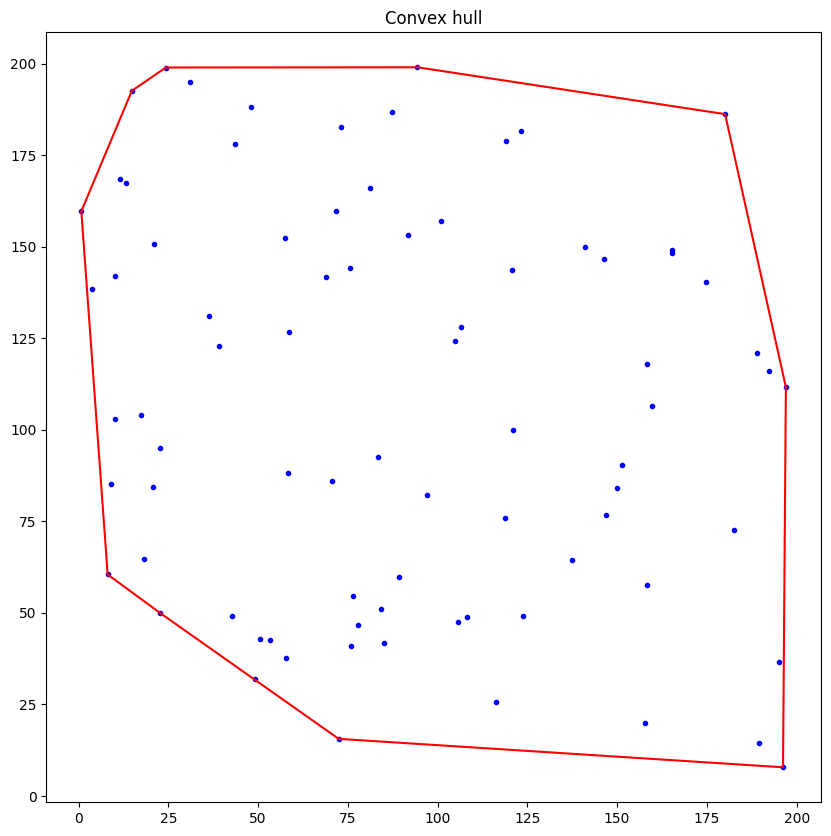

In [9]:
Pgw = copy.deepcopy(P)
Pgwar = np.array(Pgw)
L = giftwrapping(Pgw)
print("Points of convex hull:")
print(L)
plot2D(Pgwar,L)

Αλγόριθμος Διαίρει και Βασίλευε.

Points of convex hull:
[[ 24.30120684 198.93916803]
 [ 14.82669443 192.577962  ]
 [  0.75756828 159.7068195 ]
 [  8.09657012  60.50586221]
 [ 22.66678593  50.01093172]
 [ 72.44746738  15.6214235 ]
 [196.21041374   7.8556431 ]
 [197.0034013  111.66161781]
 [180.07789953 186.21153539]
 [ 94.39333278 199.00652756]]


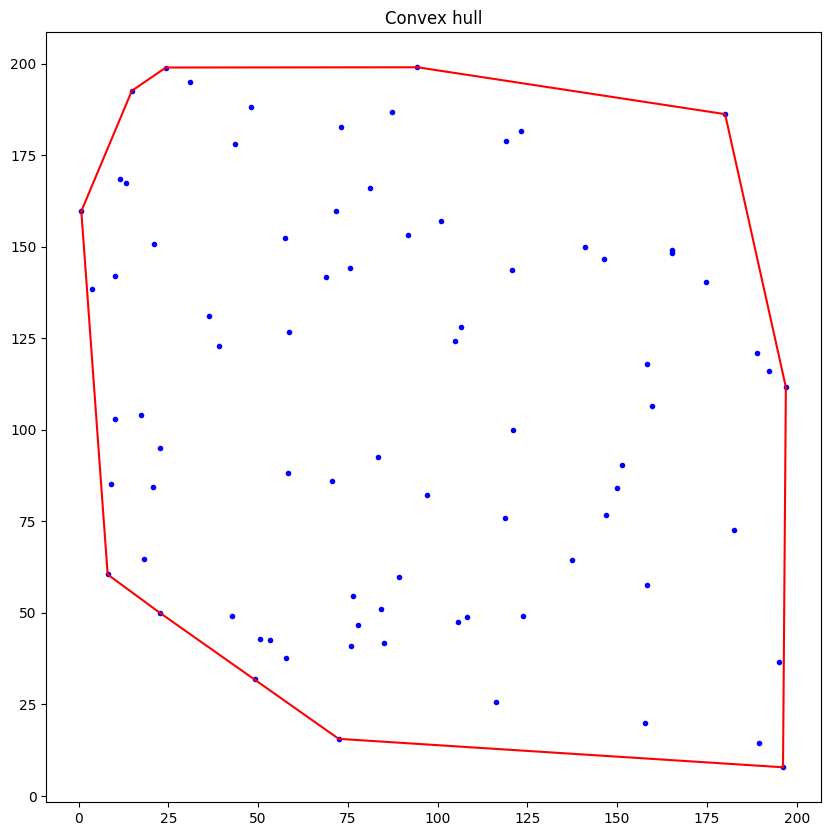

In [10]:
Pdc = copy.deepcopy(P)
Pdcar = np.array(Pdc)
L = divideConquer(Pdc)
print("Points of convex hull:")
print(np.array(L))
plot2D(Pdcar,np.array(L))

Αλγόριθμος Quickhull (2D).

Points of convex hull:
[[196.21041374   7.8556431 ]
 [197.0034013  111.66161781]
 [180.07789953 186.21153539]
 [ 94.39333278 199.00652756]
 [ 24.30120684 198.93916803]
 [ 14.82669443 192.577962  ]
 [  0.75756828 159.7068195 ]
 [  8.09657012  60.50586221]
 [ 22.66678593  50.01093172]
 [ 72.44746738  15.6214235 ]]


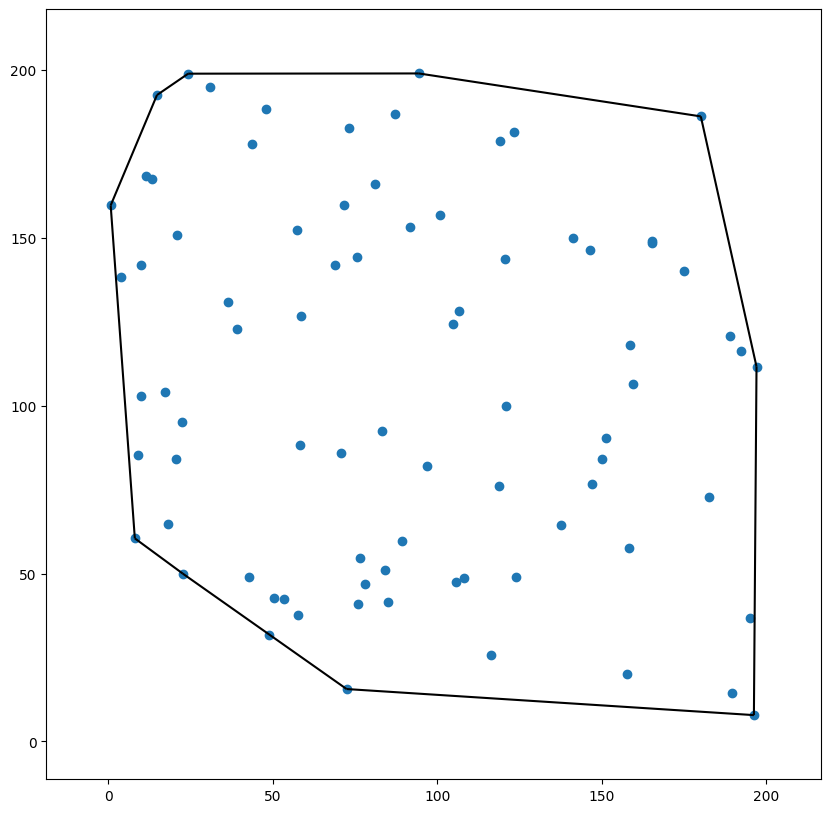

In [11]:
Pqh = copy.deepcopy(P)
Pqhar = np.array(Pqh)
L = quickhull(Pqh)
print("Points of convex hull:")
print(Pqhar[L.vertices])
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(L,ax)
plt.show()

β) Επιλέγουμε τον αυξητικό αλγόριθμο για την οπτικοποίηση των βημάτων του.

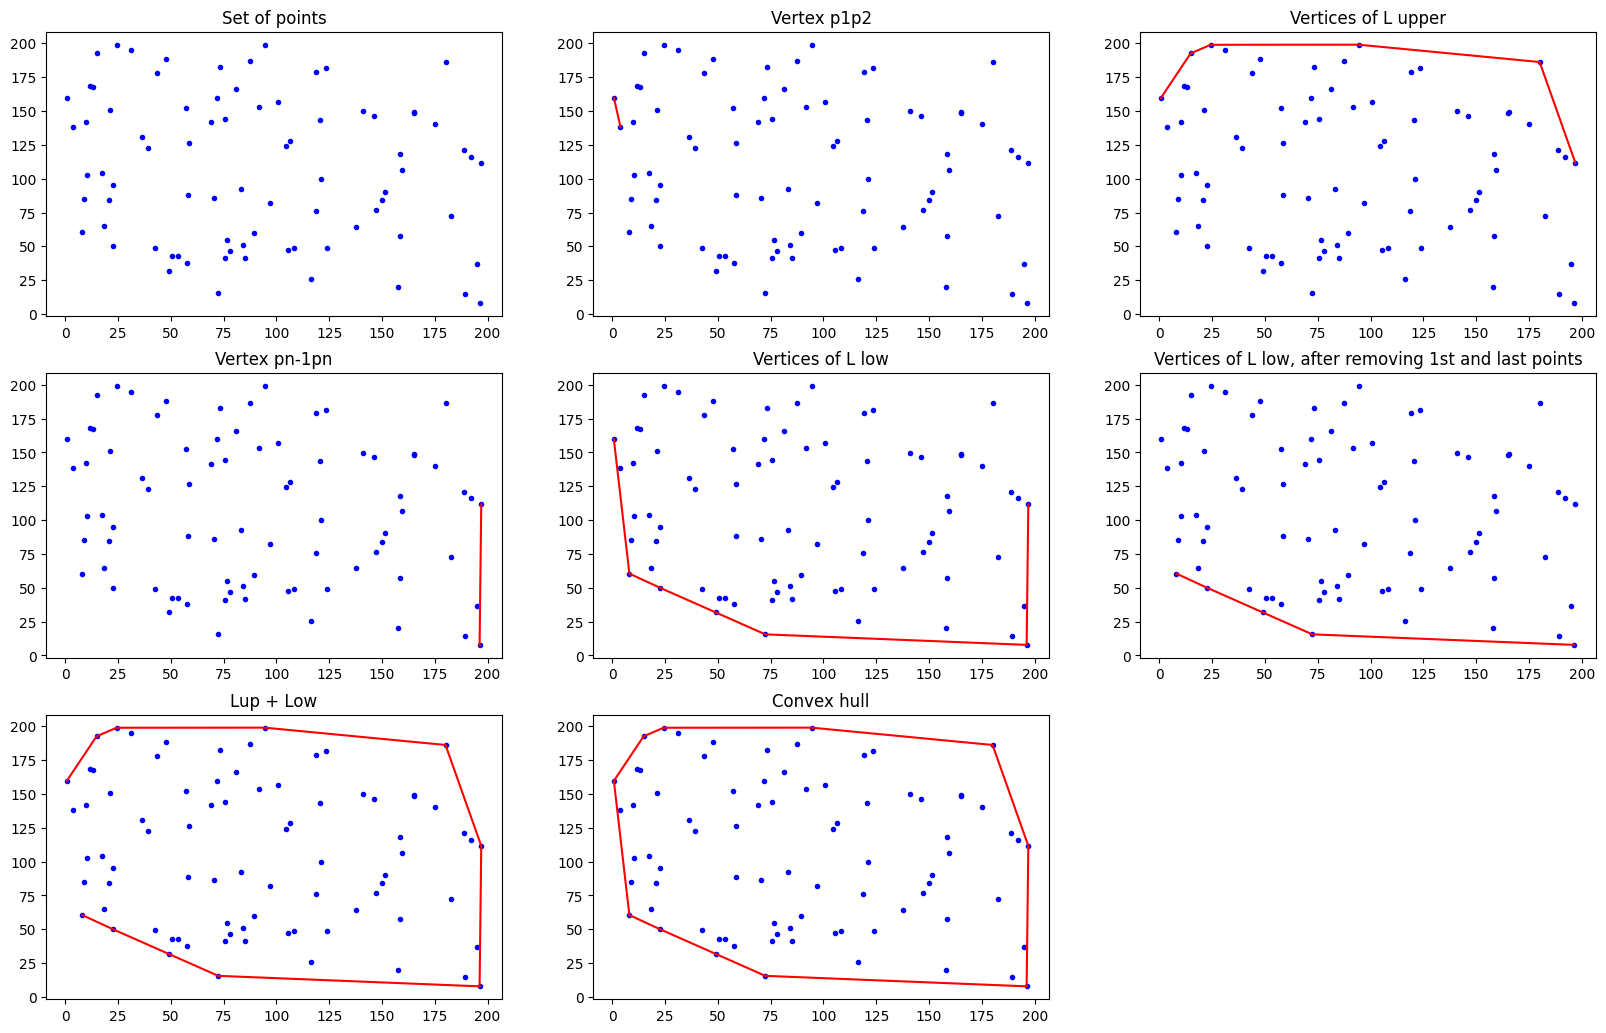

In [12]:
Pinc.sort()
fig = plt.figure(figsize=(20,17))
ax = fig.add_subplot(431)
Pincar = np.array(Pinc)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.title("Set of points")

ax = fig.add_subplot(432)
Lup = [Pinc[0],Pinc[1]]
Lupar = np.array((list(Pinc[0]),list(Pinc[1])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        #plotting p1 and p2
plt.title("Vertex p1p2")

for i in range(2,len(Pinc)):
  Lup.append(Pinc[i])
  while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):
    Lup.pop(len(Lup)-2)

ax = fig.add_subplot(433)
j = 0
Lupar = [list(Lup[j]) for j in range(len(Lup))]
Lupar = np.array(Lupar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')
plt.title("Vertices of L upper")


ax = fig.add_subplot(434)
Llow  = [Pinc[len(Pinc)-1],Pinc[len(Pinc)-2]]
Llowar = np.array((list(Pinc[len(Pinc)-1]),list(Pinc[len(Pinc)-2])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')        #plotting pn and pn-1
plt.title("Vertex pn-1pn")

for i in range(len(Pinc)-3,-1,-1):
  Llow.append(Pinc[i])
  while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):
    Llow.pop(len(Llow)-2)

ax = fig.add_subplot(435)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')
plt.title("Vertices of L low")

Llow.pop(0)
Llow.pop(len(Llow)-1)

ax = fig.add_subplot(436)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')
plt.title("Vertices of L low, after removing 1st and last points")

L = Lup + Llow

ax = fig.add_subplot(437)
j = 0
Lar = [list(L[j]) for j in range(len(L))]
Lar = np.array(Lar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lar[:,0],Lar[:,1],'r-')
plt.title("Lup + Low")


ax = fig.add_subplot(438)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
x = Lar[:,0]
y = Lar[:,1]
plt.plot(x,y,'r-')
xlast = [Lar[len(x)-1,0],Lar[0,0]]
ylast = [Lar[len(x)-1,1],Lar[0,1]]
plt.plot(xlast, ylast, 'r-')    #plot last vertex
plt.title("Convex hull")
plt.show()

2) Θα τρέξουμε τους παραπάνω αλγόριθμους για 500, για 1000, για 10.000 και για 100.000 σημεία και θα συγκρίνουμε τους χρόνους εκτέλεσής τους και τα αποτελέσματά τους.

500 σημεία:

In [13]:
import time

P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(500)]
Par1 = np.array(P)
print("List of points:")
print(Par1)

Pinc1 = copy.deepcopy(P)
Pgw1 = copy.deepcopy(P)
Pdc1 = copy.deepcopy(P)
Pqh1 = copy.deepcopy(P)

Pincar1 = np.array(Pinc1)
Pgwar1 = np.array(Pgw1)
Pdcar1 = np.array(Pdc1)
Pqhar1 = np.array(Pqh1)

tstart = time.time()
inc1 = incremental(Pinc1)
tend = time.time()
tinc1 = tend-tstart

tstart = time.time()
gw1 = giftwrapping(Pgw1)
tend = time.time()
tgw1 = tend-tstart

tstart = time.time()
dc1 = divideConquer(Pdc1)
tend = time.time()
tdc1 = tend-tstart

tstart = time.time()
qh1 = quickhull(Pqh1)
tend = time.time()
tqh1 = tend-tstart

List of points:
[[1.57031671e+02 9.34236405e+01]
 [3.65549059e+01 1.82388384e+02]
 [2.69072410e+01 5.82877069e+01]
 [1.65673377e+02 2.41596351e+01]
 [1.32687046e+02 1.74600544e+02]
 [1.56804192e+02 1.97169776e+02]
 [1.64451708e+02 8.29216185e+01]
 [9.46908007e+01 1.18332547e+02]
 [2.08485239e+01 1.58484542e+02]
 [7.48444958e+01 1.86035679e+02]
 [8.89341359e+01 9.90936494e-01]
 [9.44888203e+01 1.46492303e+02]
 [1.73972549e+02 7.66286622e+01]
 [1.91736766e+01 6.34701385e+01]
 [1.00175878e+02 3.35699515e-01]
 [8.63977760e+01 5.37170448e+01]
 [1.52283127e+02 1.48885932e+02]
 [8.67259766e+01 1.39452124e+02]
 [1.32833402e+02 1.60059942e+02]
 [2.85611696e+01 1.92488417e+02]
 [1.02755854e+02 4.39353064e+01]
 [4.50042566e+01 1.81268775e+01]
 [1.45667140e+02 9.09481986e+01]
 [1.81581859e+02 7.48503882e+01]
 [1.47975492e+02 1.60063374e+02]
 [5.68451354e+01 5.55142229e+01]
 [1.28948592e+02 5.21070211e+01]
 [1.98106198e+01 1.27531786e+02]
 [1.73619550e+01 1.48497661e+02]
 [1.79352025e+02 1.33012727

1000 σημεία:

In [14]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(1000)]
Par2 = np.array(P)
print("List of points:")
print(Par2)

Pinc2 = copy.deepcopy(P)
Pgw2 = copy.deepcopy(P)
Pdc2 = copy.deepcopy(P)
Pqh2 = copy.deepcopy(P)

Pincar2 = np.array(Pinc2)
Pgwar2 = np.array(Pgw2)
Pdcar2 = np.array(Pdc2)
Pqhar2 = np.array(Pqh2)

tstart = time.time()
inc2 = incremental(Pinc2)
tend = time.time()
tinc2 = tend-tstart

tstart = time.time()
gw2 = giftwrapping(Pgw2)
tend = time.time()
tgw2 = tend-tstart

tstart = time.time()
dc2 = divideConquer(Pdc2)
tend = time.time()
tdc2 = tend-tstart

tstart = time.time()
qh2 = quickhull(Pqh2)
tend = time.time()
tqh2 = tend-tstart

List of points:
[[ 23.17020704  34.31286115]
 [136.34876711 119.82106932]
 [ 21.6448463  185.248327  ]
 ...
 [ 16.92737543  44.85312665]
 [ 14.76788893  89.86788572]
 [181.88602897  72.82082203]]


10.000 σημεία:

In [15]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(10000)]
Par3 = np.array(P)
print("List of points:")
print(Par3)

Pinc3 = copy.deepcopy(P)
Pgw3 = copy.deepcopy(P)
Pdc3 = copy.deepcopy(P)
Pqh3 = copy.deepcopy(P)

Pincar3 = np.array(Pinc3)
Pgwar3 = np.array(Pgw3)
Pdcar3 = np.array(Pdc3)
Pqhar3 = np.array(Pqh3)

tstart = time.time()
inc3 = incremental(Pinc3)
tend = time.time()
tinc3 = tend-tstart

tstart = time.time()
gw3 = giftwrapping(Pgw3)
tend = time.time()
tgw3 = tend-tstart

tstart = time.time()
dc3 = divideConquer(Pdc3)
tend = time.time()
tdc3 = tend-tstart

tstart = time.time()
qh3 = quickhull(Pqh3)
tend = time.time()
tqh3 = tend-tstart

List of points:
[[167.86964085 132.83901046]
 [ 68.17955871  85.69847784]
 [ 77.58283821 134.0684765 ]
 ...
 [128.41432192 170.06948655]
 [ 94.52373845 160.79633618]
 [143.89140983 140.36281766]]


100.000 σημεία:

In [16]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(100000)]
Par4 = np.array(P)
print("List of points:")
print(Par4)

Pinc4 = copy.deepcopy(P)
Pgw4 = copy.deepcopy(P)
Pdc4 = copy.deepcopy(P)
Pqh4 = copy.deepcopy(P)

Pincar4 = np.array(Pinc4)
Pgwar4 = np.array(Pgw4)
Pdcar4 = np.array(Pdc4)
Pqhar4 = np.array(Pqh4)

tstart = time.time()
inc4 = incremental(Pinc4)
tend = time.time()
tinc4 = tend-tstart

tstart = time.time()
gw4 = giftwrapping(Pgw4)
tend = time.time()
tgw4 = tend-tstart

tstart = time.time()
dc4 = divideConquer(Pdc4)
tend = time.time()
tdc4 = tend-tstart

tstart = time.time()
qh4 = quickhull(Pqh4)
tend = time.time()
tqh4 = tend-tstart

List of points:
[[ 99.52237356 182.00893853]
 [144.69098056  63.42357968]
 [ 32.09107486  75.55868449]
 ...
 [ 30.33080489  33.12969269]
 [ 16.0880251  136.98178855]
 [ 24.10164975  70.16684392]]


Σύγκριση χρόνων σε δευτερόλεπτα:

In [17]:
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('Points/Time(sec)','Incremental','Giftwrapping','Divide and Conquer', 'Quickhull'))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('500 points',tinc1,tgw1,tdc1,tqh1))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('1000 points',tinc2,tgw2,tdc2,tqh2))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('10000 points',tinc3,tgw3,tdc3,tqh3))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('100000 points',tinc4,tgw4,tdc4,tqh4))

Points/Time(sec)     Incremental               Giftwrapping              Divide and Conquer        Quickhull                
500 points           0.0018801689147949219     0.006894588470458984      0.004347562789916992      0.0015158653259277344    
1000 points          0.0037119388580322266     0.016669034957885742      0.00711369514465332       0.0013849735260009766    
10000 points         0.0497891902923584        0.2525143623352051        0.07668614387512207       0.006196737289428711     
100000 points        0.5479035377502441        5.044182538986206         0.9656085968017578        0.04848051071166992      


Παρατηρούμε ότι ο αλγόριθμος περιτυλίγματος αργεί να δώσει λύση σε σχέση με τους άλλους και αυτό φαίνεται ξεκάθαρα στα 100.000 σημεία. Ο πιο γρήγορος αλγόριθμος είναι ο Quickhull, ωστόσο και ο αυξητικός αλλά και ο Διαίρει και Βασίλευε δίνουν αποτελέσματα σε εύλογο χρόνο (κάτω από 1 δευτερόλεπτο).

Αποτελέσματα αλγορίθμων σε γραφικές παραστάσεις:

500 σημεία:

Points of incremental's convex hull
[[6.11500684e-02 9.20033036e+01]
 [1.07413124e+00 1.68444886e+02]
 [4.14920379e+00 1.95129143e+02]
 [9.66768702e+00 1.98007548e+02]
 [3.43382236e+01 1.99917657e+02]
 [1.32390209e+02 1.99513177e+02]
 [1.94407583e+02 1.98512518e+02]
 [1.99305288e+02 1.91782769e+02]
 [1.99334189e+02 1.06983033e+01]
 [1.76020969e+02 1.29229199e+00]
 [1.62541218e+02 3.68443646e-01]
 [1.00175878e+02 3.35699515e-01]
 [7.36825295e+00 1.55515699e+00]
 [3.63227316e+00 7.38068654e+00]
 [1.49468138e+00 2.37882332e+01]]
Total number: 15
Points of giftwrapping convex hull
[[6.11500684e-02 9.20033036e+01]
 [1.49468138e+00 2.37882332e+01]
 [3.63227316e+00 7.38068654e+00]
 [7.36825295e+00 1.55515699e+00]
 [1.00175878e+02 3.35699515e-01]
 [1.62541218e+02 3.68443646e-01]
 [1.76020969e+02 1.29229199e+00]
 [1.99334189e+02 1.06983033e+01]
 [1.99305288e+02 1.91782769e+02]
 [1.94407583e+02 1.98512518e+02]
 [1.32390209e+02 1.99513177e+02]
 [3.43382236e+01 1.99917657e+02]
 [9.66768702e+00 1.9

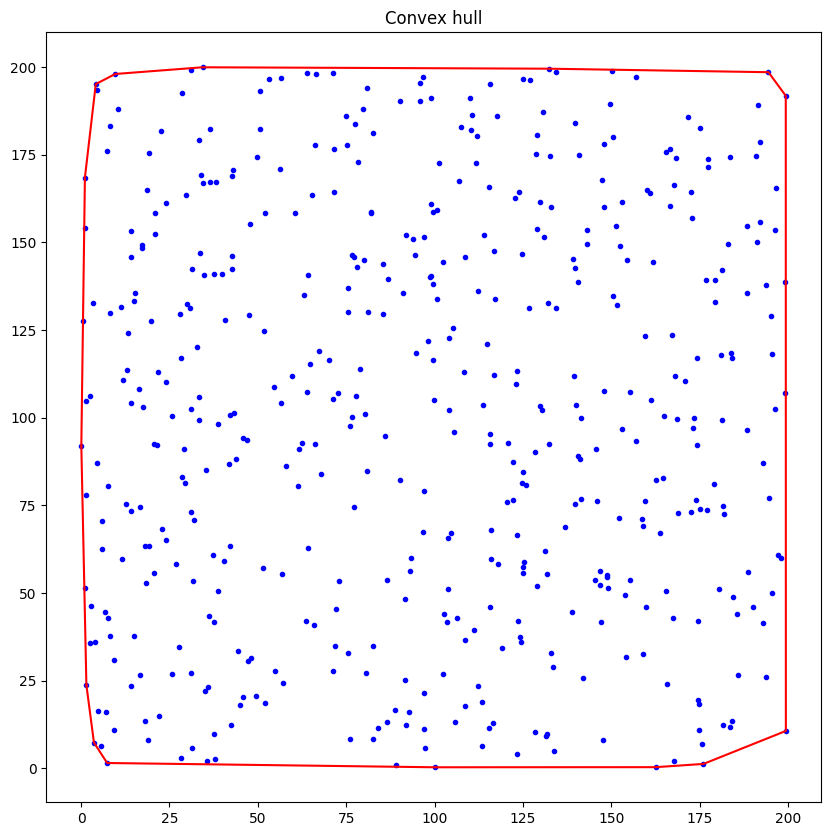

Giftwrapping:


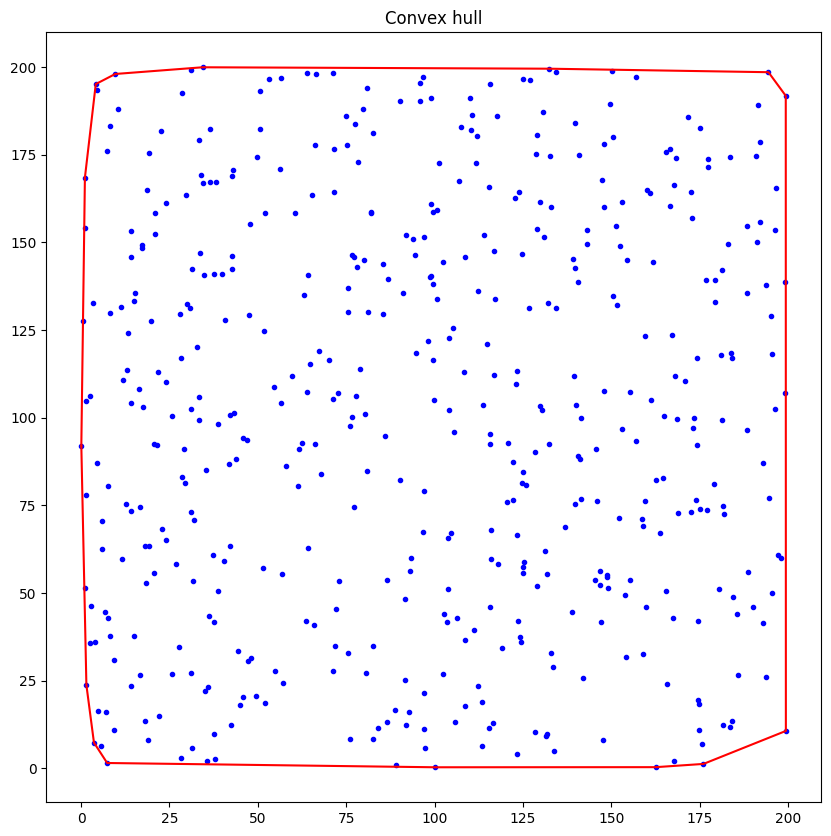

Divide and conquer:


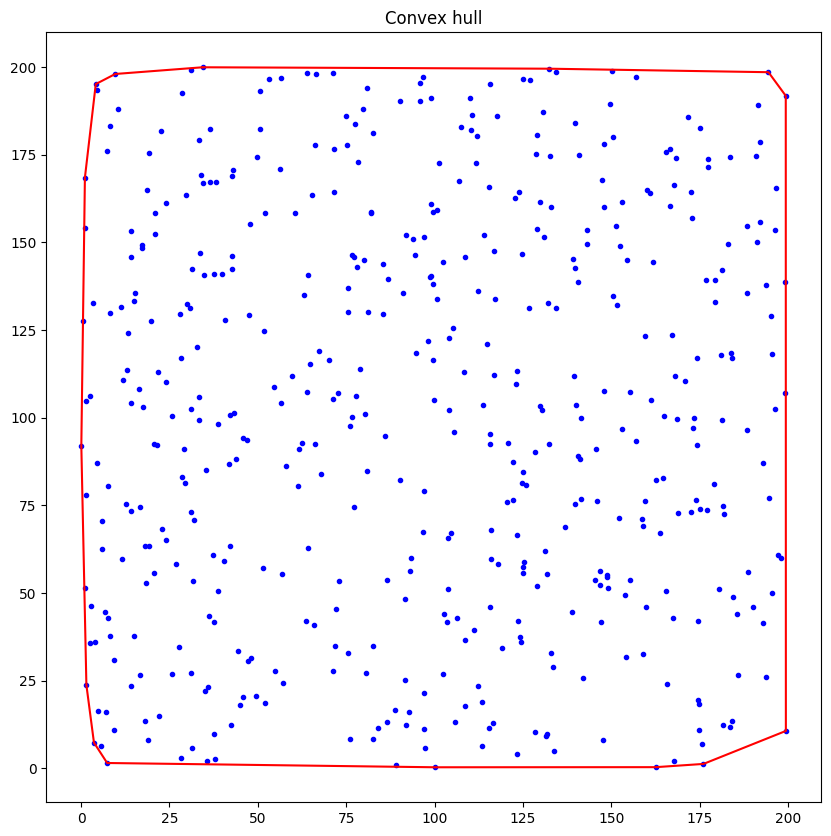

Quickhull:


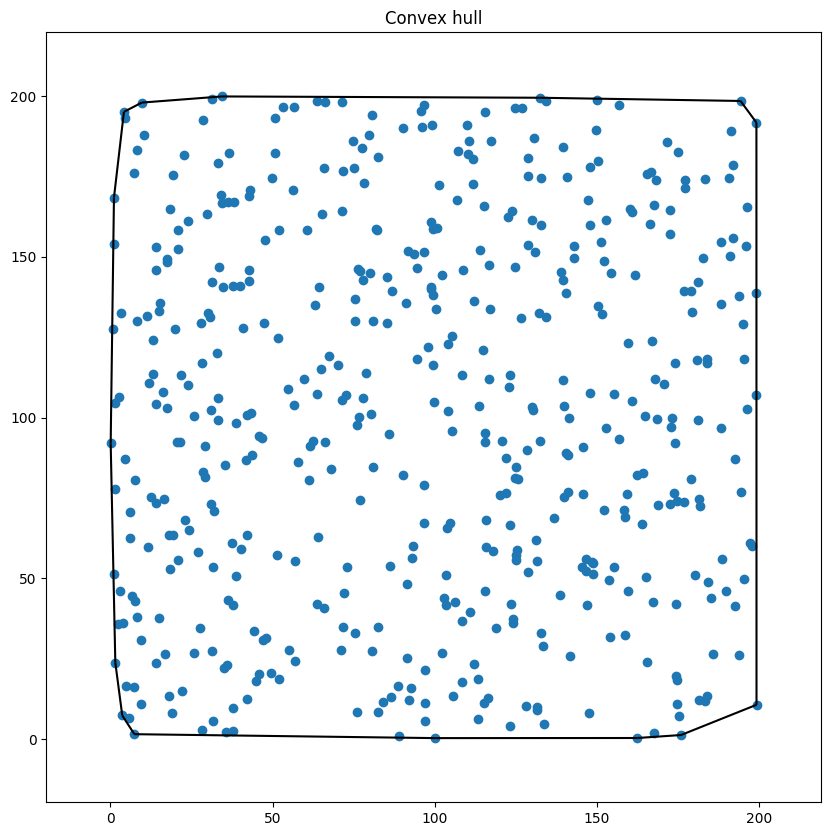

In [18]:
print('Points of incremental\'s convex hull')
print(inc1)
print('Total number:',len(inc1))
print('Points of giftwrapping convex hull')
print(gw1)
print('Total number:',len(gw1))
print('Points of divide and conquer convex hull')
print(np.array(dc1))
print('Total number:',len(dc1))
print('Points of quickhull\'s convex hull')
print(Pqhar1[qh1.vertices])
print('Total number:',len(qh1.simplices))

print("Incremental:")
plot2D(Pincar1,inc1)
print("Giftwrapping:")
plot2D(Pgwar1,gw1)
print("Divide and conquer:")
plot2D(Pdcar1,np.array(dc1))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh1,ax)
plt.title("Convex hull")
plt.show()

1000 σημεία:

Points of incremental's convex hull
[[  0.32228504 140.17524964]
 [  0.94730234 160.27147485]
 [  2.27552018 179.77978858]
 [  3.57630132 190.22841058]
 [ 10.90089473 193.02640262]
 [ 17.06852912 195.17426029]
 [ 54.68646175 199.99124876]
 [186.1833252  199.68074332]
 [192.94569653 199.4918515 ]
 [197.65474359 186.16287629]
 [198.97337801 167.25728208]
 [199.90495987 137.69446272]
 [199.25045185   1.4814323 ]
 [195.55444798   0.55912125]
 [ 90.15849045   0.22115437]
 [  9.13593365   1.0290182 ]
 [  5.38990183   5.13394855]
 [  2.20839316  14.68171607]
 [  0.64230208  38.25107944]]
Total number: 19
Points of giftwrapping convex hull
[[  0.32228504 140.17524964]
 [  0.64230208  38.25107944]
 [  2.20839316  14.68171607]
 [  5.38990183   5.13394855]
 [  9.13593365   1.0290182 ]
 [ 90.15849045   0.22115437]
 [195.55444798   0.55912125]
 [199.25045185   1.4814323 ]
 [199.90495987 137.69446272]
 [198.97337801 167.25728208]
 [197.65474359 186.16287629]
 [192.94569653 199.4918515 ]
 [186.183325

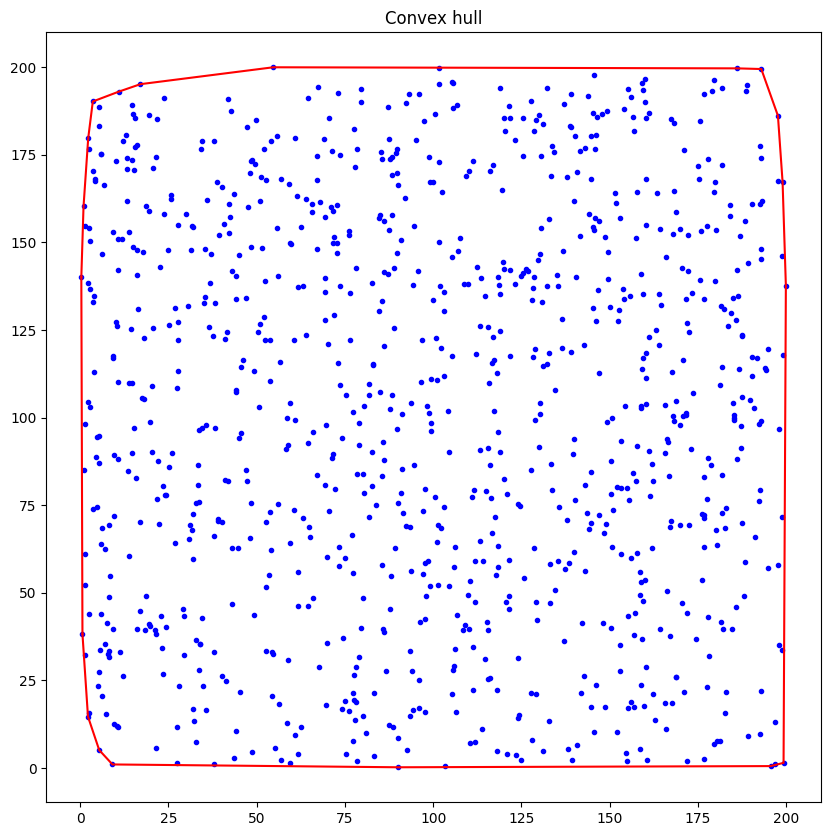

Giftwrapping:


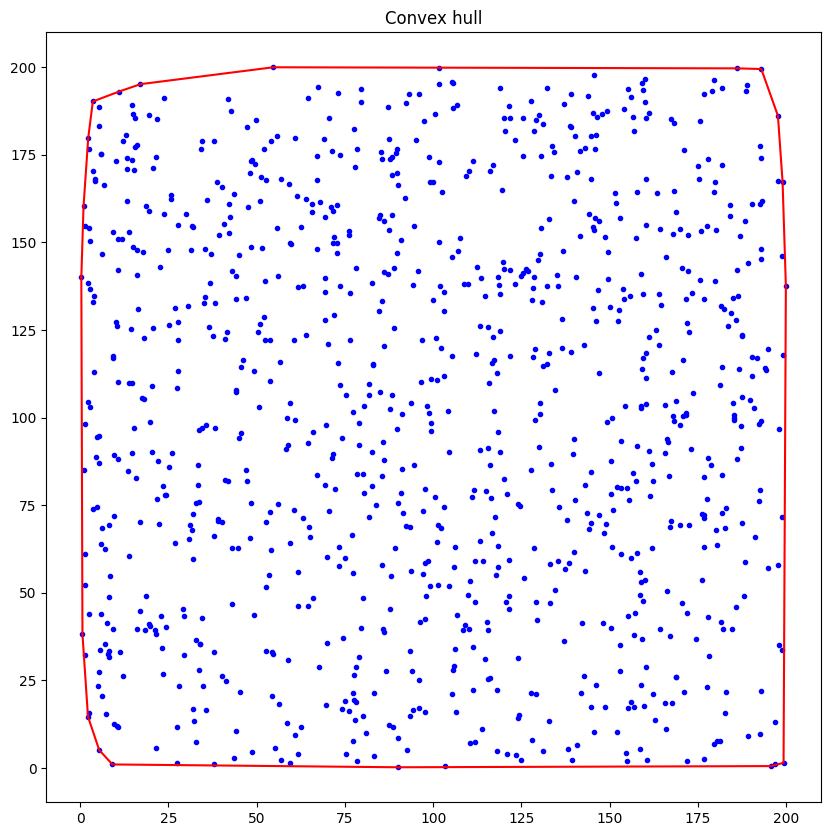

Divide and conquer:


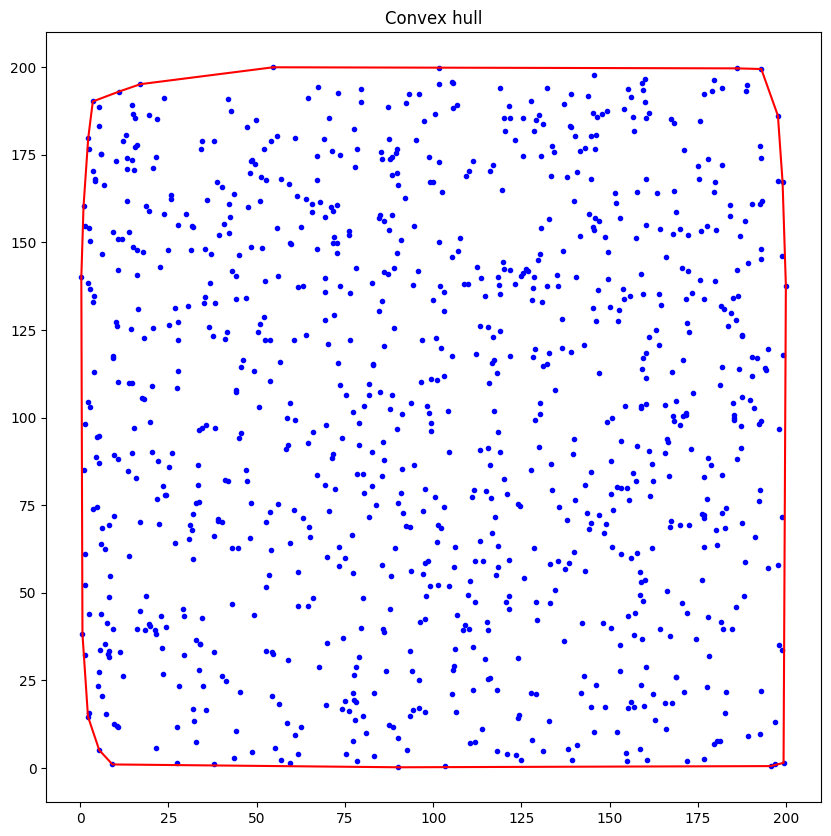

Quickhull:


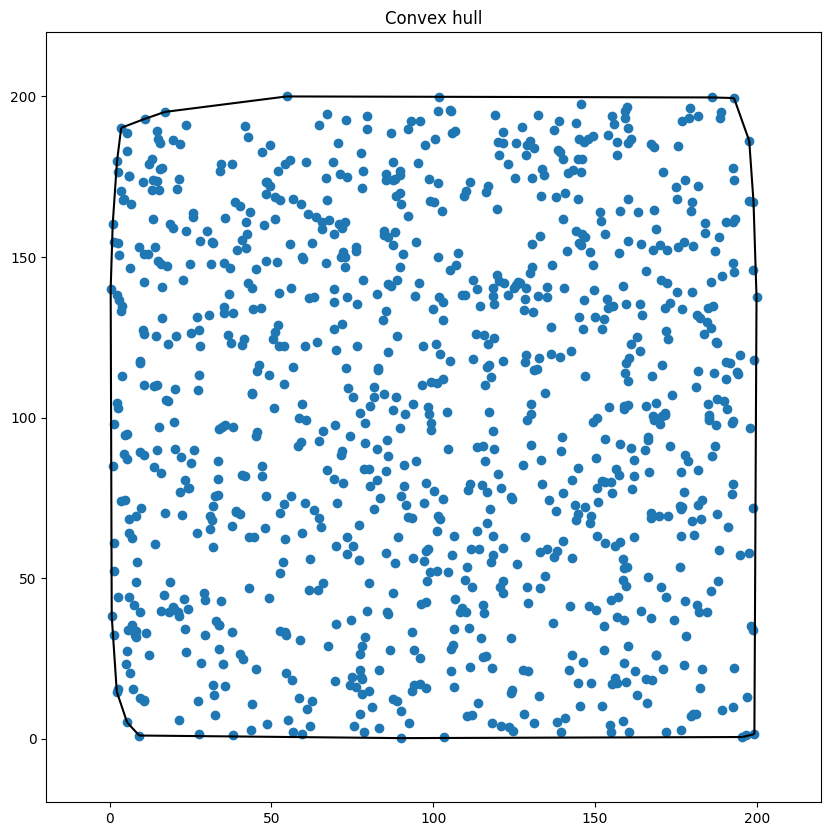

In [19]:
print('Points of incremental\'s convex hull')
print(inc2)
print('Total number:',len(inc2))
print('Points of giftwrapping convex hull')
print(gw2)
print('Total number:',len(gw2))
print('Points of divide and conquer convex hull')
print(np.array(dc2))
print('Total number:',len(dc2))
print('Points of quickhull\'s convex hull')
print(Pqhar2[qh2.vertices])
print('Total number:',len(qh2.simplices))

print("Incremental:")
plot2D(Pincar2,inc2)
print("Giftwrapping:")
plot2D(Pgwar2,gw2)
print("Divide and conquer:")
plot2D(Pdcar2,np.array(dc2))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh2,ax)
plt.title("Convex hull")
plt.show()

10000 σημεία:

Points of incremental's convex hull
[[1.03033182e-02 4.27720622e+01]
 [1.49459926e-02 6.05736796e+01]
 [5.53457846e-02 1.68522010e+02]
 [7.24088704e-02 1.94953387e+02]
 [2.29706301e+00 1.99590505e+02]
 [7.95231572e+01 1.99869702e+02]
 [1.43900914e+02 1.99904899e+02]
 [1.74474933e+02 1.99870095e+02]
 [1.97018907e+02 1.99759237e+02]
 [1.97723023e+02 1.98942040e+02]
 [1.98361846e+02 1.97469490e+02]
 [1.98941327e+02 1.94286906e+02]
 [1.99992031e+02 1.86854299e+02]
 [1.99969994e+02 6.46127053e-01]
 [1.53569661e+02 8.58183043e-02]
 [1.39067415e+02 2.72741031e-02]
 [1.11744746e+01 2.68809094e-02]
 [5.32588738e-01 1.77145247e+00]
 [3.45195072e-01 4.33707736e+00]
 [6.52850048e-02 8.58720909e+00]
 [2.30744126e-02 1.29238581e+01]]
Total number: 21
Points of giftwrapping convex hull
[[1.03033182e-02 4.27720622e+01]
 [2.30744126e-02 1.29238581e+01]
 [6.52850048e-02 8.58720909e+00]
 [3.45195072e-01 4.33707736e+00]
 [5.32588738e-01 1.77145247e+00]
 [1.11744746e+01 2.68809094e-02]
 [1.39067415e+02 2.7

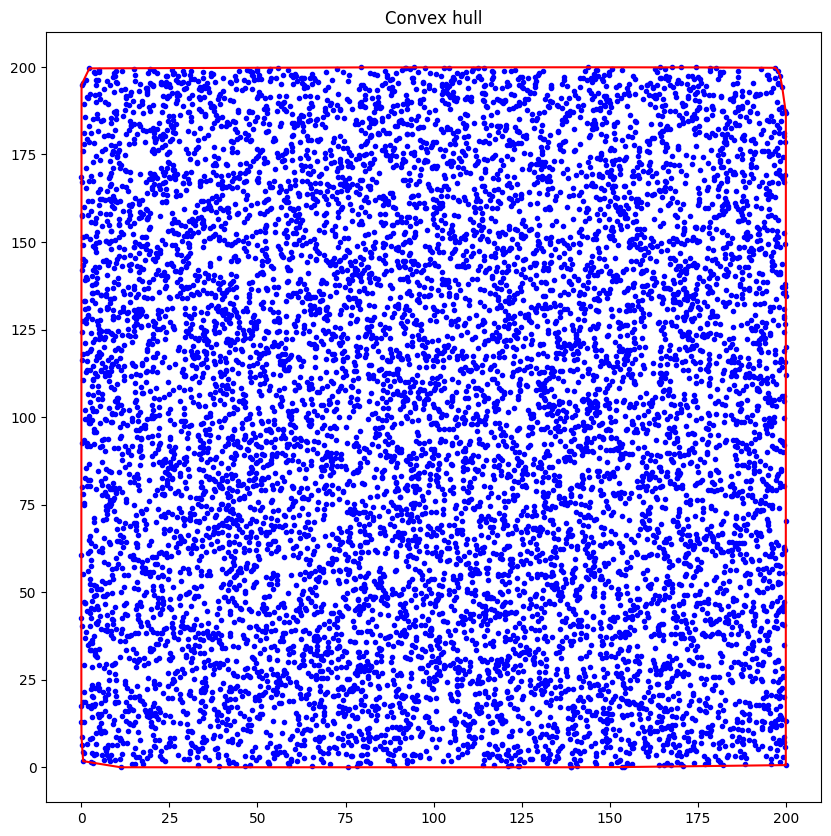

Giftwrapping:


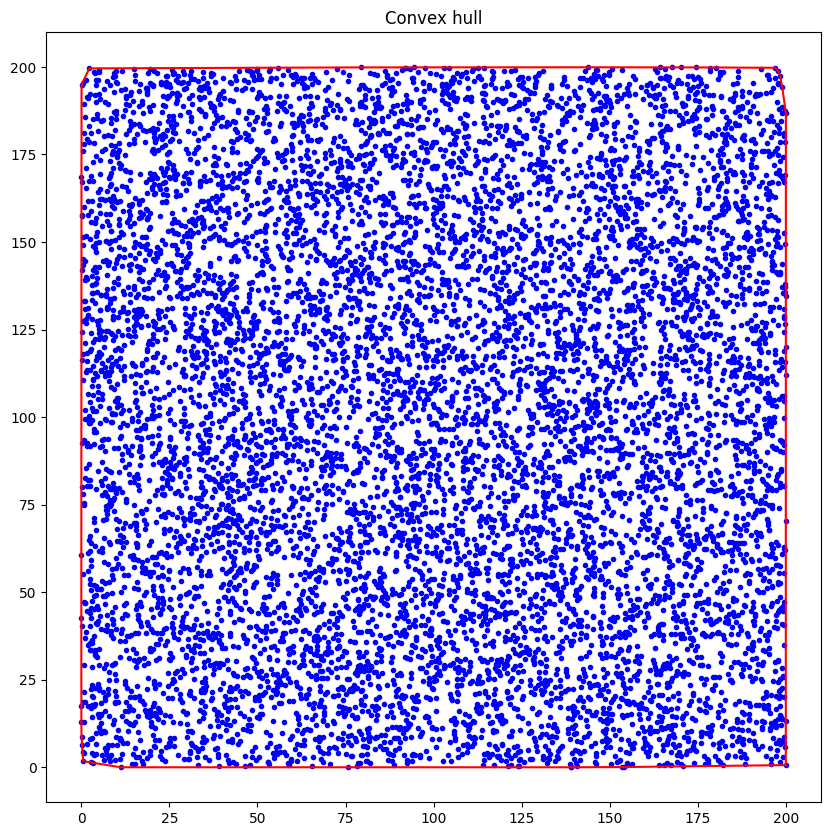

Divide and conquer:


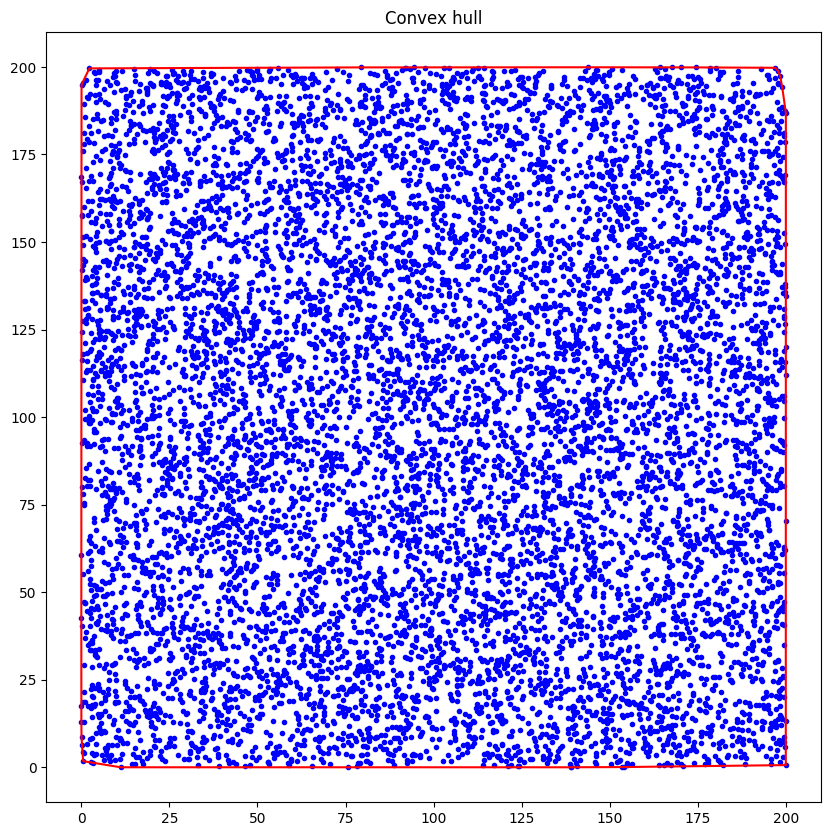

Quickhull:


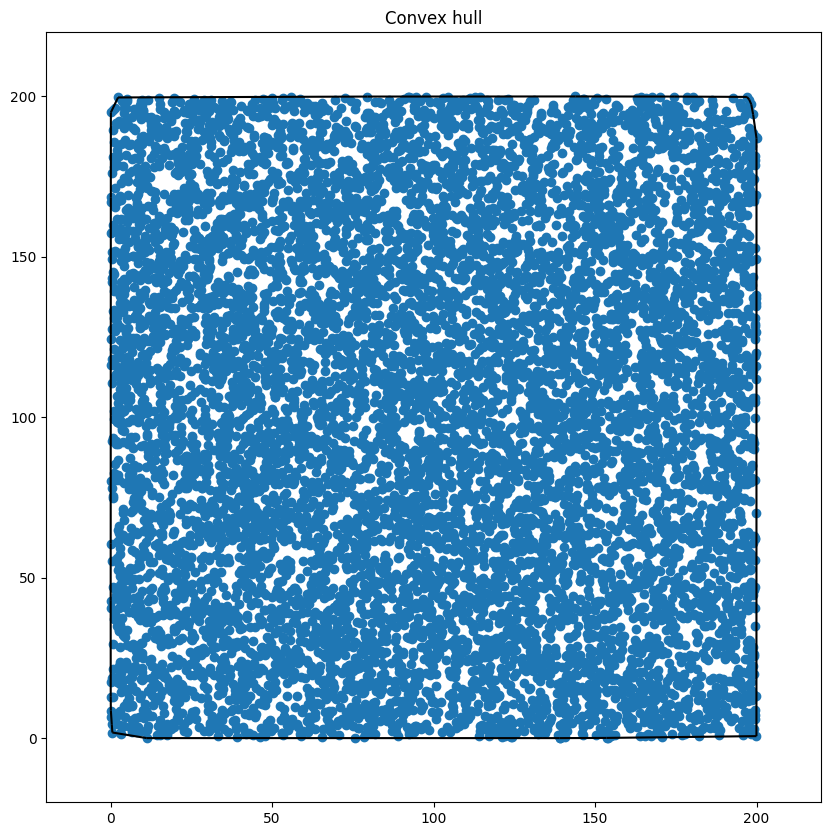

In [20]:
print('Points of incremental\'s convex hull')
print(inc3)
print('Total number:',len(inc3))
print('Points of giftwrapping convex hull')
print(gw3)
print('Total number:',len(gw3))
print('Points of divide and conquer convex hull')
print(np.array(dc3))
print('Total number:',len(dc3))
print('Points of quickhull\'s convex hull')
print(Pqhar3[qh3.vertices])
print('Total number:',len(qh3.simplices))


print("Incremental:")
plot2D(Pincar3,inc3)
print("Giftwrapping:")
plot2D(Pgwar3,gw3)
print("Divide and conquer:")
plot2D(Pdcar3,np.array(dc3))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh3,ax)
plt.title("Convex hull")
plt.show()

100.000 σημεία:

Points of incremental's convex hull
[[1.43025679e-04 7.37940242e+01]
 [6.72865301e-04 1.92208597e+02]
 [1.05158436e-02 1.99507202e+02]
 [1.76459509e-01 1.99968002e+02]
 [2.13122088e+01 1.99989099e+02]
 [8.61236418e+01 1.99999629e+02]
 [1.51536379e+02 1.99998481e+02]
 [1.67356534e+02 1.99988405e+02]
 [1.95920278e+02 1.99948099e+02]
 [1.99914797e+02 1.99823786e+02]
 [1.99927160e+02 1.97707267e+02]
 [1.99984124e+02 1.84733600e+02]
 [1.99993550e+02 1.64070302e+02]
 [1.99996618e+02 9.74460764e+01]
 [1.99998181e+02 1.50077808e+01]
 [1.99912956e+02 4.85818216e+00]
 [1.99870663e+02 3.23458303e+00]
 [1.99775013e+02 7.58857592e-01]
 [1.99441822e+02 5.02275563e-01]
 [1.96319050e+02 5.92208745e-02]
 [1.84719920e+02 1.36288274e-03]
 [1.32992523e+02 1.79408403e-03]
 [1.54673417e+01 3.66713293e-03]
 [3.66248809e+00 1.81936492e-02]
 [1.63964540e+00 2.41949801e-01]
 [6.89345174e-01 9.15286174e-01]
 [7.24792398e-02 2.57561762e+00]
 [5.04637581e-03 4.05698346e+00]]
Total number: 28
Points of giftwrapping

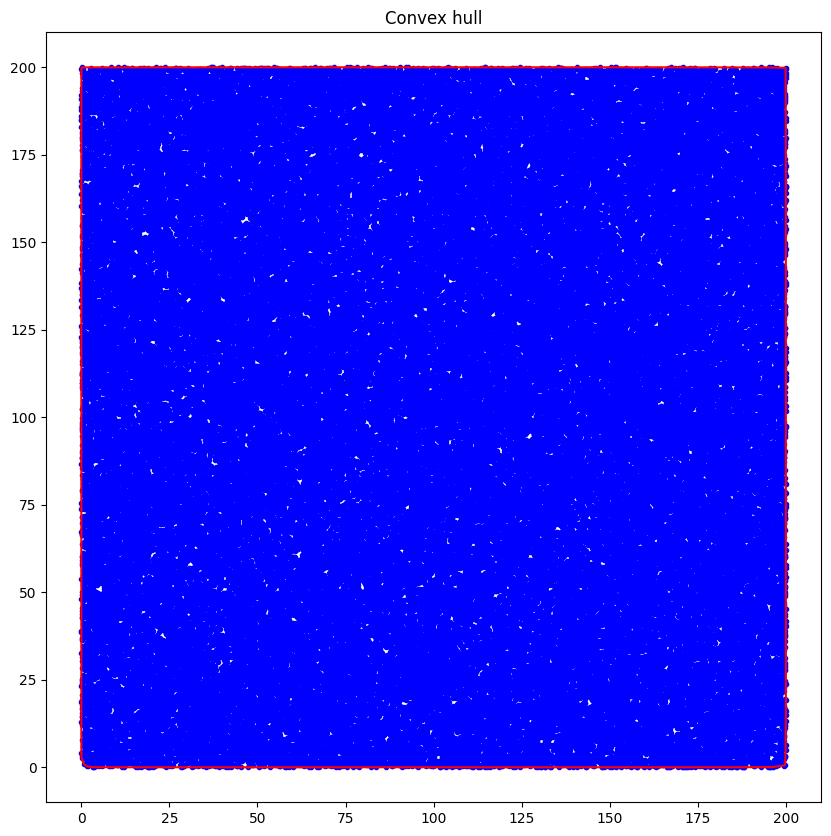

Giftwrapping:


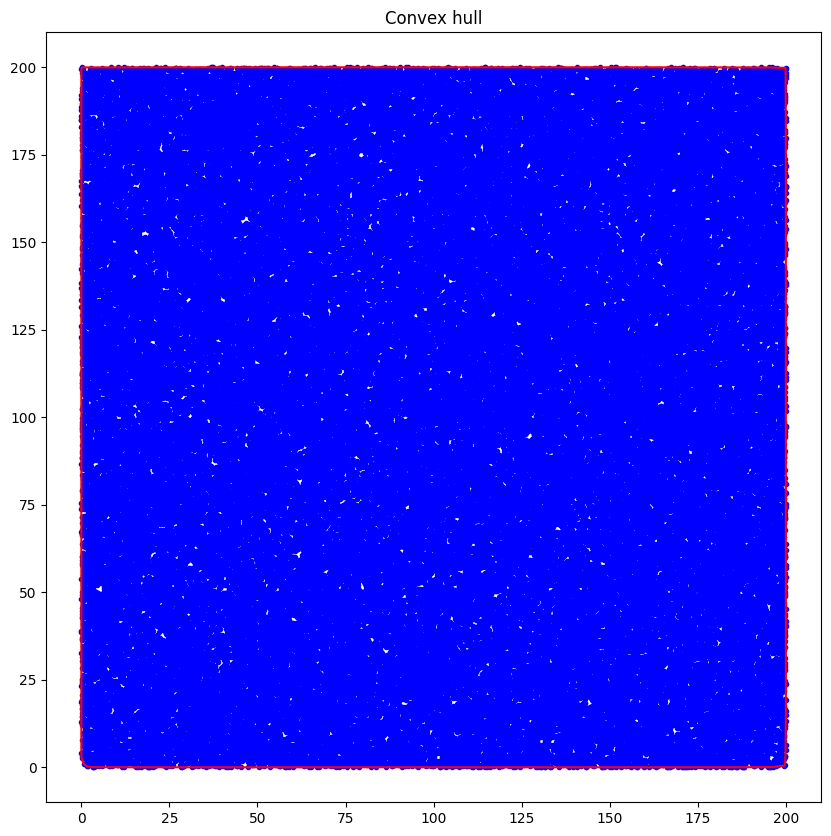

Divide and conquer:


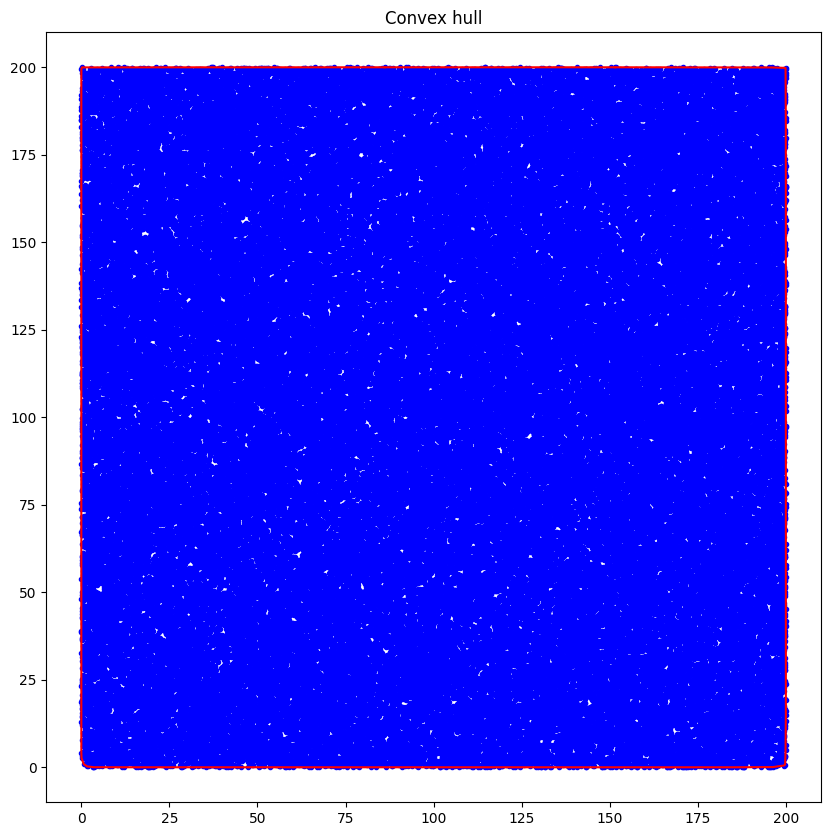

Quickhull:


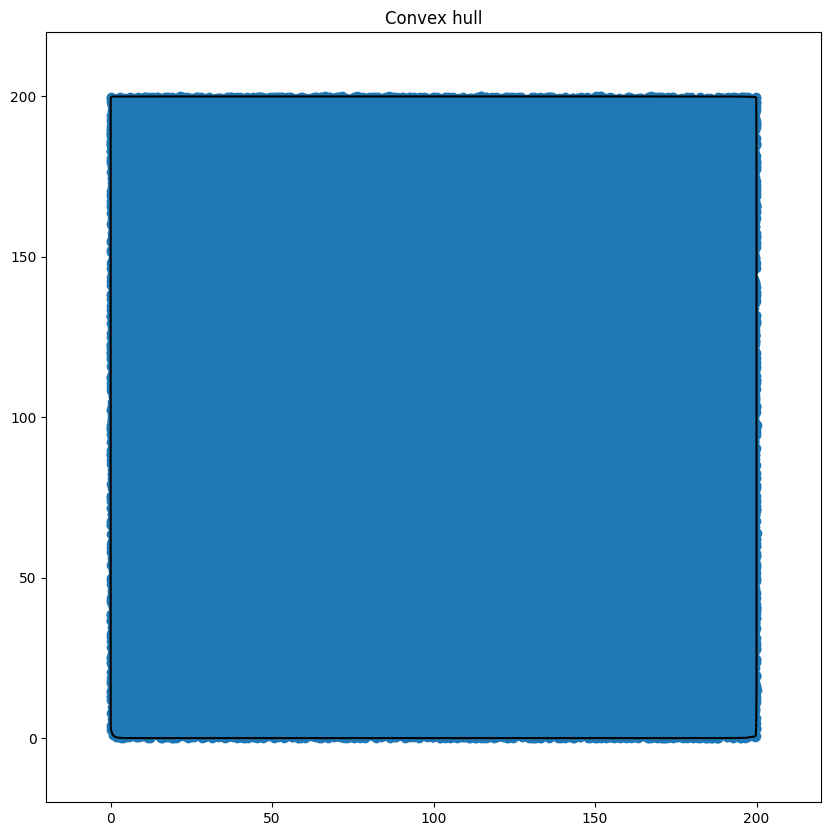

In [21]:
print('Points of incremental\'s convex hull')
print(inc4)
print('Total number:',len(inc4))
print('Points of giftwrapping convex hull')
print(gw4)
print('Total number:',len(gw4))
print('Points of divide and conquer convex hull')
print(np.array(dc4))
print('Total number:',len(dc4))
print('Points of quickhull\'s convex hull')
print(Pqhar4[qh4.vertices])
print('Total number:',len(qh4.simplices))

print("Incremental:")
plot2D(Pincar4,inc4)
print("Giftwrapping:")
plot2D(Pgwar4,gw4)
print("Divide and conquer:")
plot2D(Pdcar4,np.array(dc4))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh4,ax)
plt.title("Convex hull")
plt.show()

3) Θεωρούμε 50 τυχαία σημεία στις 3 διαστάσεις:

In [22]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(50)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 14.11286844   3.61540017 198.74548097]
 [ 12.94223647  90.01524013  27.24582535]
 [ 87.01088152 137.22891217  84.48894117]
 [ 78.47513625 188.2886915    2.66700241]
 [ 17.48477579  41.10262186 100.77545296]
 [ 54.1632128  162.58641589 180.08324637]
 [  8.28474842   0.37994339  87.26281104]
 [ 81.21150948  38.50036812 173.58037569]
 [ 51.86576137 166.48782203  27.0169028 ]
 [119.53337788  58.78332557  13.44627212]
 [ 14.85591808  45.58955215  38.46016906]
 [ 21.96732158 165.5267152   32.09364164]
 [130.83315343  29.7915574   24.12090979]
 [108.18496928  70.48545568  28.39212364]
 [103.81043966  50.13241501  13.08755016]
 [ 19.8162622   82.31013719 112.83309695]
 [ 68.501928   104.03304609 146.31754499]
 [121.11089652 132.83322987  61.56996685]
 [135.47185977 137.65043865  49.92089477]
 [ 94.82144801 103.75677156 181.28909627]
 [ 22.95939994 118.83734432  94.42071934]
 [110.29397106  93.81941121  27.34736216]
 [113.48084423  26.13972689  76.27164894]
 [ 62.19986274 193

Αλγόριθμος Quickhull (3D).

Points of convex hull:
[[ 14.11286844   3.61540017 198.74548097]
 [ 12.94223647  90.01524013  27.24582535]
 [ 78.47513625 188.2886915    2.66700241]
 [ 54.1632128  162.58641589 180.08324637]
 [  8.28474842   0.37994339  87.26281104]
 [ 81.21150948  38.50036812 173.58037569]
 [ 14.85591808  45.58955215  38.46016906]
 [ 21.96732158 165.5267152   32.09364164]
 [103.81043966  50.13241501  13.08755016]
 [ 62.19986274 193.72326148  13.48005679]
 [179.85771438 115.35818822 113.88212296]
 [197.43673905  19.19050664   5.73430244]
 [141.93551994 148.48695372 166.16818554]
 [ 89.23958726 166.85671545 195.54030058]
 [165.96716284  17.15924974  92.53815189]
 [ 21.31959549   2.21823507 123.54685104]
 [144.35205402 166.80341851  46.83536864]
 [147.95535266 198.21015954 112.22210359]
 [ 34.15785198 100.0424677    8.23929117]
 [156.14741225  92.68540105 145.27331304]
 [108.64625682 116.14218666 180.56939658]
 [159.96951729 163.66620088 118.4896473 ]]


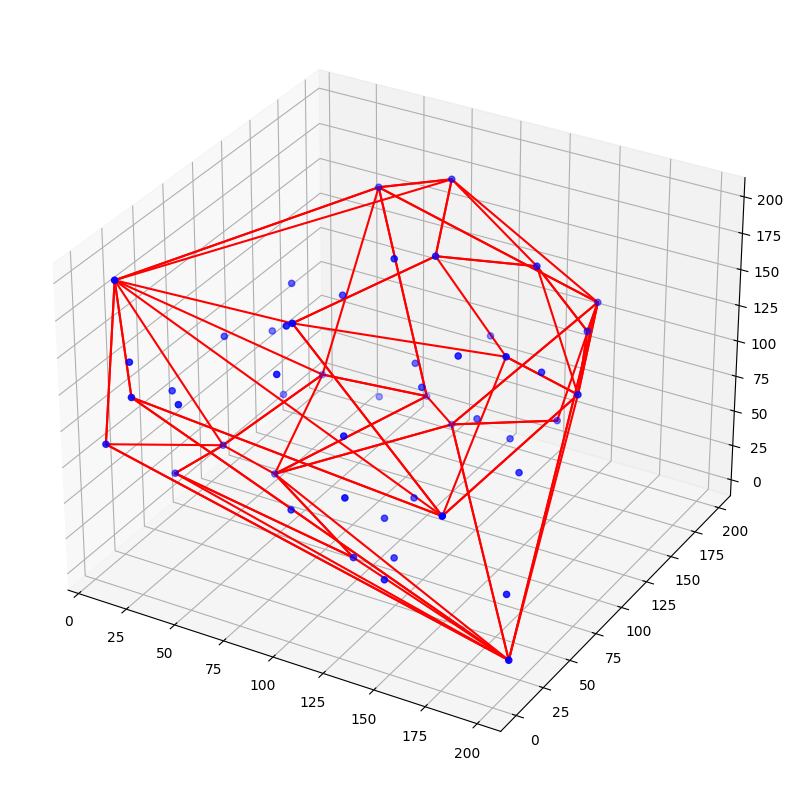

In [24]:
from matplotlib import axis
def plot3D(Par,L):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  x = Par[:,0]
  y = Par[:,1]
  z = Par[:,2]
  ax.scatter(x,y,z,c='b')
  for s in L.simplices:
      simplices = np.append(s, s[0])
      x = Par[s, 0]
      y = Par[s, 1]
      z = Par[s, 2]
      ax.plot(x,y,z,'r-')

  plt.show()

L = quickhull3d(P)
print("Points of convex hull:")
print(Par[L.vertices])
plot3D(Par,L)

#**Υλοποίηση 2: Γεωμετρική αναζήτηση.**


1) Διδιάστατη γεωμετρική αναζήτηση με χρήση kd tree.

In [25]:
class Kdnode:             #class for a kdtree node
  def __init__(self,v):
    self.v = v
    self.vleft = None
    self.vright = None

def createKd(P,depth=0):

  if (len(P) == 0):
    return None

  if (len(P) == 1):
    return Kdnode(P[0])         #single leaf

  elif (len(P) > 1):

    if(depth % 2 == 0):             #even
      mode = "vertical"
      P.sort(key=lambda x: x[0])
    else:
      mode = "horizontal"                   #odd
      P.sort(key=lambda x: x[1])

    l = math.ceil(len(P)/2)
    node = Kdnode((P[l], mode))           #store line and mode
    node.vleft = createKd(P[:l],depth+1)
    node.vright = createKd(P[l:],depth+1)

    return node


def reportSubtree(root:Kdnode, leaves):

  if (root == None):
    return

  reportSubtree(root.vleft,leaves)

  if(root.vleft == None and root.vright == None):     #root is leaf
    leaves.append(root.v)

  reportSubtree(root.vright, leaves)


def searchKd(node: Kdnode, curR, R, leaves):

  if (node == None):
    return

  if (node.vleft == None and node.vright == None):   #root is leaf
    if (R[0][0] <= node.v[0] <= R[1][0] and R[0][1] <= node.v[1] <= R[1][1]):   #R contains leaf
      leaves.append(node.v)
    return

  leftregion, rightregion = None, None    #leftregion == downregion and rightregion = upregion when mode = horizontal
  if(node.v[1] == "vertical"):
    leftregion = ((curR[0][0],node.v[0][0]),(curR[1][0],curR[1][1]))     #set xmax
    rightregion = ((node.v[0][0],curR[0][1]),(curR[1][0],curR[1][1]))    #set xmin
  elif(node.v[1] == "horizontal"):
    leftregion = ((curR[0][0],curR[0][1]),(curR[1][0],node.v[0][1]))     #set ymax
    rightregion = ((curR[0][0],curR[0][1]),(node.v[0][1],curR[1][1]))    #set ymin

  if R[0][0] <= leftregion[0][0] and R[0][1] <= leftregion[1][0] and R[1][0] >= leftregion[0][1] and R[1][1] >= leftregion[1][1]: #R contains the whole left region
    reportSubtree(node.vleft,leaves)
  elif not(R[0][0] > leftregion[0][1] or R[1][0] < leftregion[0][0] or R[0][1] > leftregion[1][1] or R[1][1] < leftregion[1][0]):     #R intersects with left region
    searchKd(node.vleft, leftregion, R, leaves)

  if R[0][0] <= rightregion[0][0] and R[0][1] <= rightregion[1][0] and R[1][0] >= rightregion[0][1] and R[1][1] >= rightregion[1][1]: #R contains the whole right region
    reportSubtree(node.vright,leaves)
  elif not(R[0][0] > rightregion[0][1] or R[1][0] < rightregion[0][0] or R[0][1] > rightregion[1][1] or R[1][1] < rightregion[1][0]):     #R intersects with right region
    searchKd(node.vright, rightregion, R, leaves)


2)Ο αλγόριθμος με το kd δέντρο χωρίζεται σε 2 μέρη: \\
 * Tην κατασκευή του kd-tree, που είναι χρονικής πολυπλοκότητας O(nlogn). Το kd
δέντρο με n σημεία καταλαμβάνει χώρο O(n), αφού έχουμε n διαφορετικά φύλλα, αλλά η χωρική πολυπλοκότητα κατασκευής του είναι O(nlogn), καθώς το δέντρο είναι δυαδικό και κάθε φύλλο και κόμβος χρησιμοποιεί χώρο O(1).

* Την διερεύνηση του kd-tree, που είναι χρονικής πολυπλοκότητας O($\sqrt{n}$+k) με k το πλήθος των αναφερόμενων σημείων.






#**Εφαρμογή 2:**

Ορίζουμε 60 σημεία και θεωρούμε πάλι ότι τα x και y παίρνουν τιμές από 0 μέχρι 200:

In [26]:
def plotPointsRect(Par, R):
  plt.figure(figsize=(10,10))
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  xr = [R[0][0],R[0][0],R[1][0],R[1][0],R[0][0]]  #plot rectangle
  yr = [R[0][1],R[1][1], R[1][1], R[0][1], R[0][1]]
  plt.plot(xr,yr,'-r')
  plt.title('Points and rectangle')

P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(60)]  #60 points
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[  5.27793292  52.17094649]
 [ 40.02809169   9.0307205 ]
 [  1.16412912 131.78421304]
 [162.09748823 199.79716613]
 [  9.09823634 197.24277078]
 [ 27.0859838  166.31187274]
 [109.9398589  164.19212302]
 [195.36401473 170.96446667]
 [ 69.7968015  117.13652575]
 [ 67.52863276 185.73236685]
 [129.57216616 150.54595999]
 [124.49334058 182.71662479]
 [173.04619954  10.37896728]
 [138.76042327 186.91899217]
 [ 54.32377083 191.00336536]
 [ 99.30558374 164.88581259]
 [ 99.45356212   1.79378344]
 [ 49.40443742 141.71122335]
 [ 25.12438987 175.21843924]
 [155.96032392  70.39025308]
 [ 55.27059723 108.11898295]
 [ 67.46428739  67.08829443]
 [ 74.81189317 161.3940207 ]
 [ 24.79417909 169.46460014]
 [153.57911526  40.49025063]
 [192.62920656  30.38822569]
 [197.38998226  64.74526656]
 [140.25104611  46.37072848]
 [ 16.6605218  107.14016641]
 [ 35.45725274   0.94061092]
 [145.64607452 144.21074729]
 [ 24.64173464 192.56714982]
 [ 41.50141441   6.05424008]
 [107.22529811  51.34902638

Ορίζουμε επίσης μία ορθογώνια περιοχή, δοσμένου του κάτω αριστερά σημείου της και του άνω δεξιά:

Number of points into the rectangle:  9
Points into the rectangle:  [(25.771936387058304, 45.1680828722246), (25.93611451651161, 77.71127283261012), (67.46428739215709, 67.08829442998304), (106.80839736144465, 36.47371334281668), (90.99299942528229, 46.36670268750818), (71.10494273195049, 55.04225649368828), (107.22529811200002, 51.34902638429295), (117.32976658989371, 94.39169103567859), (140.25104611315456, 46.370728475957776)]


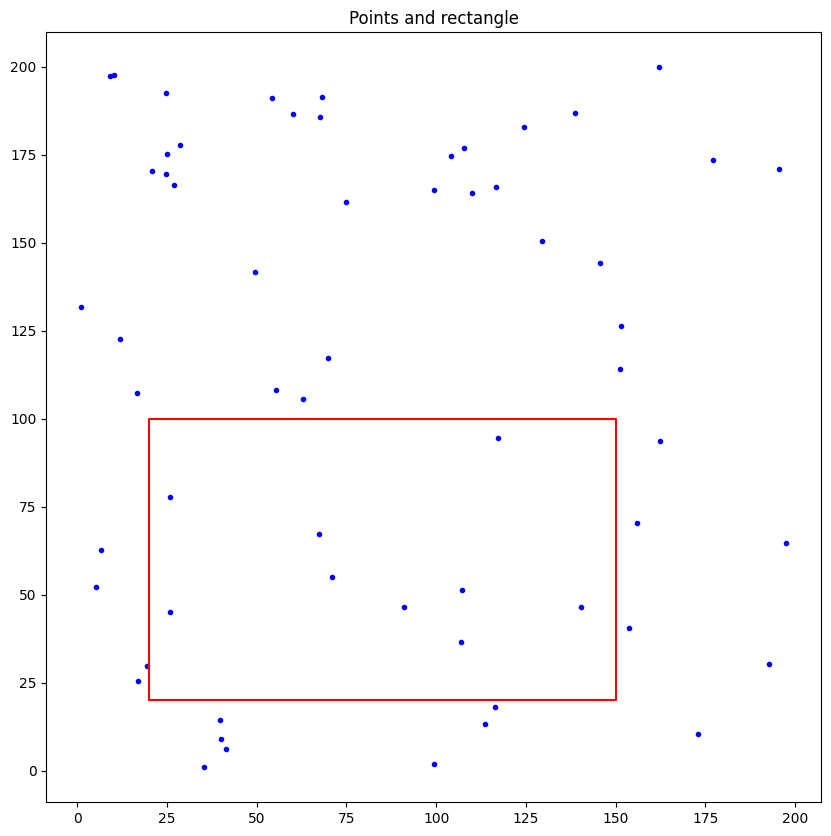

In [27]:
root = createKd(P)
infreg = ((-float("inf"),float("inf")),(-float("inf"),float("inf")))  #((xleft,xright),(ydown,yup))
R = ((20.0,20.0),(150.0,100.0))   #((xmin,ymin),(xmax, ymax)) for rectangle
leaves = []
searchKd(root, infreg, R, leaves)
print('Number of points into the rectangle: ', len(leaves))
print('Points into the rectangle: ', leaves) #points into the rectangle
plotPointsRect(Par, R)

#**Εφαρμογή 3: Διάγραμμα Voronoi - Τριγωνοποίηση Delaunay.**

1) Ορίζουμε n=8 για την καλύτερη απεικόνιση της αντιστοιχίας των διαγραμμάτων Delaunay και Voronoi:

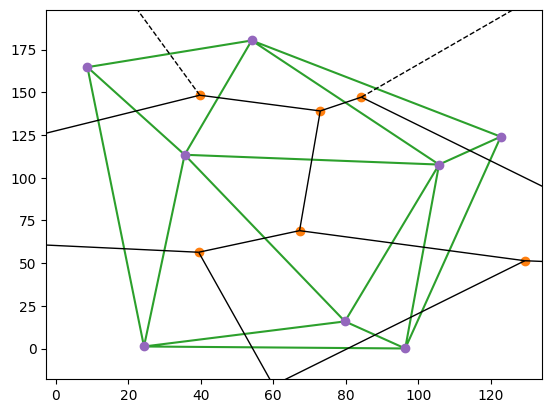

In [29]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

N = 8
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(N)]
Par = np.array(P)

#voronoi
v = Voronoi(P)
vplot = voronoi_plot_2d(v)

#delaunay
d = Delaunay(P)
plt.triplot(Par[:,0],Par[:,1],d.simplices)
plt.plot(Par[:,0],Par[:,1],'o')
plt.show()

2) Πολυπλοκότητα αλγορίθμων: Η πολυπλοκότητα των 2 αλγορίθμων είναι πολυωνυμική O(nlogn). Γνωρίζουμε και παρατηρούμε από την απεικόνιση ότι το διάγραμμα Delaunay αποτελεί τον δυϊκό γράφο του Voronoi, κάτι που έχει αντίκτυπο και στην πολυπλοκότητα και τον χρόνο εκτέλεσης των αλγορίθμων (είναι παρόμοια). Σε οποιοδήποτε πλήθος σημείων εισόδου, οι 2 αλγόριθμοι εκτελούνται στον ίδιο περίπου χρόνο, με τον Delaunay να εκτελείται λίγο πιο γρήγορα. Επιπλέον, το πλήθος των σημείων επηρεάζει τον χρόνο εκτέλεσης των αλγορίθμων ειδικά σε μεγάλα πλήθη, όπου ο χρόνος εκτέλεσης αυξάνεται γραμμικά. Για παράδειγμα, εαν 10πλασιάσουμε των αριθμό των σημείων (από 100.000 σε 1.000.000), ο χρόνος εκτέλεσης 10πλασιάζεται (από 1 sec σε 10 sec περίπου).
(Οι παραπάνω παρατηρήσεις προέκυψαν έπειτα από δοκιμές.)